# ***Required libraries***

In [1]:
# Importing & run "required libraries" to Google Colab Notebook from our Drive space
from google.colab import drive

drive.mount('/content/drive')
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_libr.ipynb"

Mounted at /content/drive
Required libraries imported


# ***Python required functions***

In [2]:
# Importing & run "required functions" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_func.ipynb"

Python required functions imported


# ***Setting up the environment and libraries***

In [3]:
# Importing & run "setting up the environment and libraries code" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_envi.ipynb"

Setting up the environment and libraries imported & run


# ***Load dataset***

In [4]:
# Importing & run "load dataset code" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_load.ipynb"

Loaded dataset


# ***EDA (Exploratory Data Analysis)***

In [5]:
# Dataframe visualization
print('Dataset head')
df_diabetes.head()

Dataset head


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Object shape analysis
print(f'The dataset contains {df_diabetes.shape[0]} rows and {df_diabetes.shape[1]} columns {df_diabetes.shape}')

The dataset contains 768 rows and 9 columns (768, 9)


In [7]:
# Displaying dataset types
print('Dataset types')
df_diabetes.info()

Dataset types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Displaying dataset value counter
print('Value counter')
df_diabetes.value_counts()

Value counter


0   1    2    3   4    5     6      7   8
0   57   60   0   0    21.7  0.735  67  0    1
    67   76   0   0    45.3  0.194  46  0    1
5   103  108  37  0    39.2  0.305  65  0    1
    104  74   0   0    28.8  0.153  48  0    1
    105  72   29  325  36.9  0.159  28  0    1
                                            ..
2   84   50   23  76   30.4  0.968  21  0    1
    85   65   0   0    39.6  0.930  27  0    1
    87   0    23  0    28.9  0.773  25  0    1
         58   16  52   32.7  0.166  25  0    1
17  163  72   41  114  40.9  0.817  47  1    1
Name: count, Length: 768, dtype: int64

### ***EDA.Missing or null values***

In [9]:
# Displaying null values count
print('Null values count')
df_diabetes.isnull().sum()

Null values count


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [10]:
# Displaying any row (instance) within all columns that are null
print('Null values in all columns of any instance (row)')
df_diabetes.isnull().all()

Null values in all columns of any instance (row)


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [11]:
# Display any row (instance) that has any column with null values
print('Null values ​​in some columns of some instance (row)')
df_diabetes.isnull().any()

Null values ​​in some columns of some instance (row)


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

Missing values ​​graph


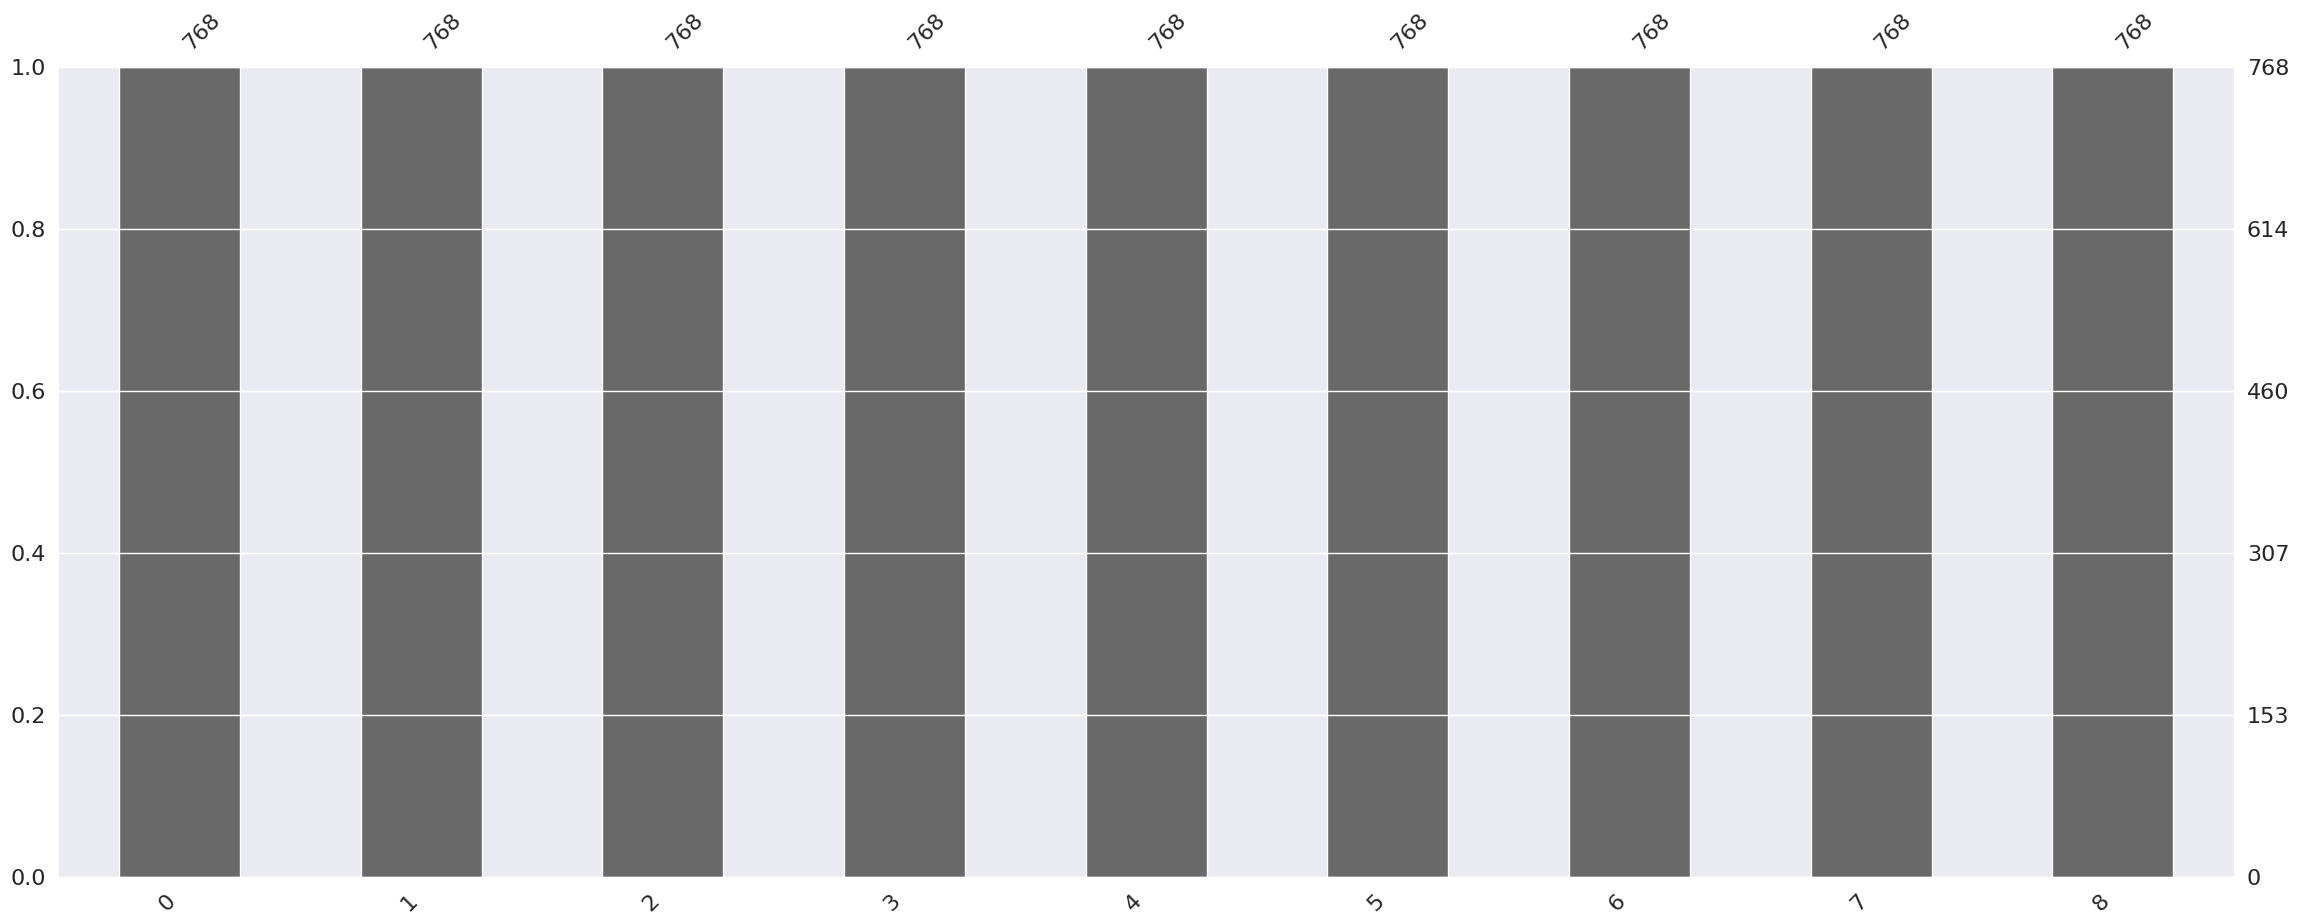

In [12]:
# Missing values ​​graph
#   if there are missing values, then total != total row number
print('Missing values ​​graph')
miss.bar(df_diabetes);

In [13]:
# Display zero values
#   if there are missing values, then replace to zero
#   that means that it counts zeroes
print('Zero values')
df_diabetes.iloc[:, 0:8].replace(to_replace=[0], value=np.nan).isna().sum().reset_index(name = 'missing_values').rename(columns={"index": "variable"}).assign( percentage = lambda df_reset: round(df_reset.missing_values/len(df_diabetes)*100,2))

Zero values


,variable,missing_values,percentage
0,0,111,14.45
1,1,5,0.65
2,2,35,4.56
3,3,227,29.56
4,4,374,48.70
5,5,11,1.43
6,6,0,0.00
7,7,0,0.00


### ***EDA.Duplicate values***

In [14]:
# Importing & run "duplicate values management" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_eda_dupl.ipynb"

There are no duplicates, so they do not need to be removed


### [***EDA.General description of attributes***](https://github.com/ddasilva64/DECTRE24001esp/tree/master/projects/docs/eda_general_description_of_attributes.md)

### ***EDA.Data preprocessing (column format)***

In [15]:
# Importing & run "data preprocessing (column format)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_eda_cfor.ipynb"

formatted dataset columns to:
 Index(['pregnancies', 'glucose', 'pressure', 'skinfold', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')


In [16]:
# Individual statistical data summary
print('Statistical data summary')
df_diabetes.describe()

Statistical data summary


,pregnancies,glucose,pressure,skinfold,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### [***EDA.Note on summarizing individual statistical data***](https://github.com/ddasilva64/DECTRE24001esp/tree/master/projects/docs/eda_note_on_summarizing_individual_statistical_data.md)



### ***EDA.Individual variable analysis (Statistical functions)***

In [17]:
# Importing & run "individual variable analysis (Statistical functions)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_eda_1sta.ipynb"

To check the result, go to df_estad dataframe, please


In [18]:
df_estad

,pregnancies,glucose,pressure,skinfold,insulin,bmi,pedigree,age,diabetes
mean,3.85,120.89,69.11,20.54,79.8,31.99,0.47,33.24,0.35
median,3.0,117.0,72.0,23.0,30.5,32.0,0.37,29.0,0.0
mode,1,100,70,0,0,32.0,0.26,22,0
total no. rows,768,768,768,768,768,768,768,768,768
no. of rows with zeroes,111,5,35,227,374,11,0,0,500
% rows with zeroes,14.45,0.65,4.56,29.56,48.7,1.43,0.0,0.0,65.1
lower limit outliers,0,37.12,35.0,0,0,13.35,0,0,0
upper limit outliers,13.5,202.12,107.0,80.0,318.12,50.55,1.21,66.5,2.5
outliers number,4,5,45,1,34,19,29,9,0
% outliers,0.52,0.65,5.86,0.13,4.43,2.47,3.78,1.17,0.0


### ***EDA.Individual variable analysis (Obesity - BMI)***

In [19]:
# Importing & run "individual variable analysis (Obesity - BMI)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_eda_obmi.ipynb"

To check the result, go to df_data_estadistImc dataframe, please


In [20]:
df_data_estadistImc

,bmi
mean BMI,31.99
mean BMI rating,obesity I
median BMI,32.0
median BMI rating,obesity I
mode BMI,32.0
mode BMI rating,obesity I
range BMI,67.1
range BMI range,NaN
lower limit outliers BMI,13.35
lower limit outliers BMI rating,thinness


### ***EDA.Individual variable analysis (Variable summary)***

In [21]:
# Importing & run "individual variable analysis (variable summary)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_eda_vsum.ipynb"

To check the result, go to df_resumen dataframe, please


In [22]:
df_resumen

,pregnancies,glucose,pressure,skinfold,insulin,bmi,pedigree,age,diabetes
type,int64,int64,int64,int64,int64,float64,float64,int64,int64
total,768,768,768,768,768,768,768,768,768
zeroes,111,5,35,227,374,11,0,0,500
not zeroes,657,763,733,541,394,757,768,768,268
% not zeroes,85.55,99.35,95.44,70.44,51.3,98.57,100.0,100.0,34.9
should not have zeroes,,X,X,X,X,X,,,
mode,1,100,70,0,0,32.0,0.26,22,0


## ***Feature Engineering***

### [***Feature Engineering.Before outlier treatment***](https://github.com/ddasilva64/DECTRE24001esp/tree/master/projects/docs/feature_engineering_before_outlier_treatment.md)

### ***Feature Engineering.Count the rows that remain, without zeroes***

In [23]:
# Importing & run "Feature Engineering (count the rows that remain, without zeroes)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_cbou.ipynb"

Total rows not cleaned: 768
Clean rows            : 392
% rows after cleaning : 51.04%


### [***Feature Engineering.Conclusions before outlier treatment***](https://github.com/ddasilva64/DECTRE24001esp/tree/master/projects/docs/feature_engineering_conclusions_before_outlier_treatment.md)

In [24]:
# Delete categories with > 20% outliers
df_diabetes.drop(columns=['skinfold', 'insulin'], inplace=True)

df_diabetes

,pregnancies,glucose,pressure,bmi,pedigree,age,diabetes
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


### ***Feature Engineering.Get average without outliers***

In [25]:
# Importing & run "Feature Engineering (get average without outliers)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_anou.ipynb"

To check the result, go to df_promedio dataframe, please


In [26]:
df_promedio

,pregnancies,glucose,pressure,bmi,pedigree
non-outlier value,2893,92847,52207,24120.8,317.65
non-outlier number,764,763,723,749,739
non-outlier mean,3.79,121.69,72.21,32.2,0.43


### ***Feature Engineering.Outliers imputation***

In [27]:
# Importing & run "Feature Engineering (outliers imputation)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_impu.ipynb"

To check the result, go to df_imputado dataframe, please


In [28]:
df_imputado

,pregnancies,glucose,pressure,bmi,pedigree
zeroes (before),111,5,35,11,0
% zeroes (before),14.45,0.65,4.56,1.43,0.0
outliers (before),4,5,45,19,29
% outliers (before),0.52,0.65,5.86,2.47,3.78
zeroes (imputed),111,0,0,0,0
% zeroes (imputed),14.45,0.0,0.0,0.0,0.0
outliers (imputed),0,0,4,3,15
% outliers (imputed),0.0,0.0,0.52,0.39,1.95


### ***Feature Engineering.Individual variable analysis (Statistical functions) -after imputation of outliers-***

In [31]:
# Importing & run "Feature Engineering (Statistical data function -after imputation of outliers-)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_aimp.ipynb"

To check the result, go to df_estad dataframe, please


In [30]:
df_estad

,pregnancies,glucose,pressure,bmi,pedigree,age,diabetes
mean,3.79,121.69,72.21,32.2,0.43,33.24,0.35
median,3.0,117.0,72.21,32.2,0.37,29.0,0.0
mode,1.0,100.0,70.0,32.2,0.43,22,0
total no. rows,768,768,768,768,768,768,768
no. of rows with zeroes,111,0,0,0,0,0,500
% rows with zeroes,14.45,0.0,0.0,0.0,0.0,0.0,65.1
lower limit outliers,0,39.0,40.0,14.3,0,0,0
upper limit outliers,13.5,201.0,104.0,49.5,1.09,66.5,2.5
outliers number,0,0,4,3,15,9,0
% outliers,0.0,0.0,0.52,0.39,1.95,1.17,0.0


### ***Feature Engineering.Individual variable analysis (Obesity - BMI) -after imputation of outliers-***

In [32]:
# Importing & run "individual variable analysis (Obesity - BMI)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_obmi.ipynb"

To check the result, go to df_data_estadistImc dataframe, please


In [33]:
df_data_estadistImc

,bmi
mean BMI,32.2
mean BMI rating,obesity I
median BMI,32.2
median BMI rating,obesity I
mode BMI,32.2
mode BMI rating,obesity I
range BMI,31.8
range BMI range,NaN
lower limit outliers BMI,14.3
lower limit outliers BMI rating,thinness


### [***Feature Engineering.After outlier treatment***](https://github.com/ddasilva64/DECTRE24001esp/tree/master/projects/docs/feature_engineering_after_outlier_treatment.md)


### ***Feature Engineering.Individual variable analysis (Variable summary, after outlier treatment)***

In [40]:
# Importing & run "individual variable analysis (variable summary, after outlier treatment)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_vsum.ipynb"

To check the result, go to df_resumen dataframe, please


In [41]:
df_resumen

,pregnancies,glucose,pressure,bmi,pedigree,age,diabetes
type,float64,float64,float64,float64,float64,int64,int64
total,768,768,768,768,768,768,768
zeroes,111,0,0,0,0,0,500
not zeroes,657,768,768,768,768,768,268
% not zeroes,85.55,100.0,100.0,100.0,100.0,100.0,34.9
should not have zeroes,,X,X,X,,,
mode,1.0,100.0,70.0,32.2,0.43,22,0


### ***Feature Engineering.Graphical analysis (histogram) of individual variables, after outlier treatment***

Histogram of individual characteristics, done


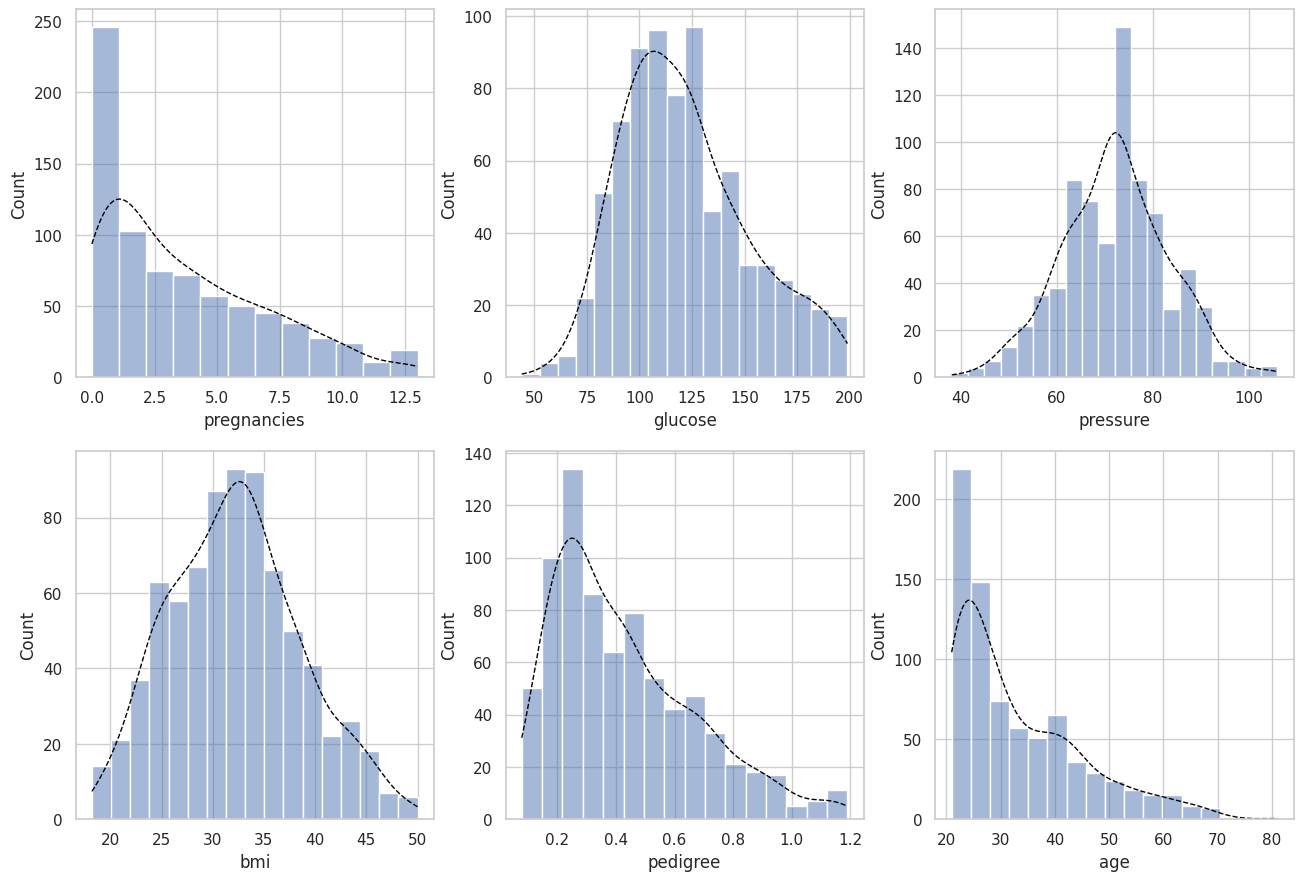

In [58]:
# Importing & run "individual variable analysis (variable summary, after outlier treatment)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_hist.ipynb"

### ***Feature Engineering.Graphical analysis (boxplot) of individual variables, after outlier treatment***

Boxplot of individual characteristics, done


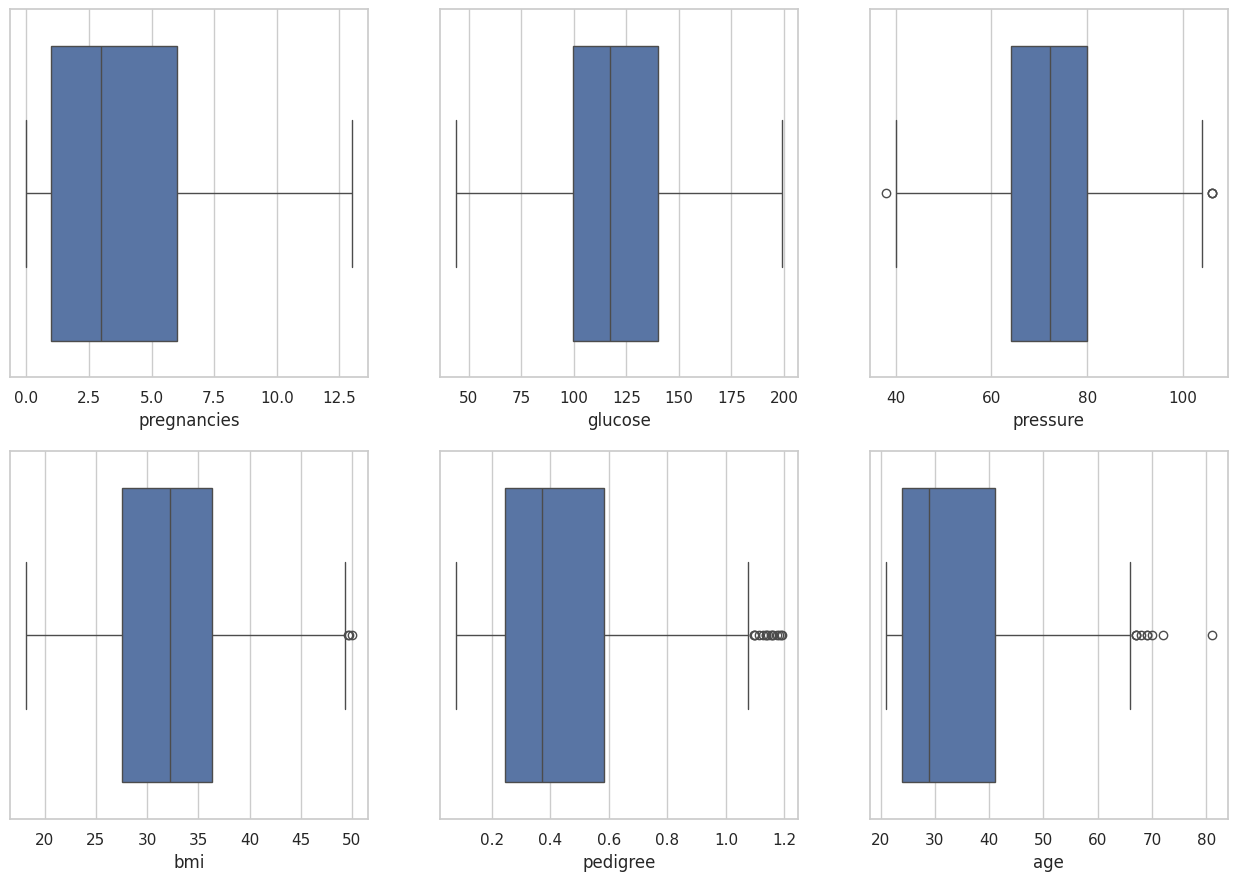

In [59]:
# Importing & run from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_boxp.ipynb"

### [***Feature Engineering.Numerical characteristics (after visualization of the graphs)***](https://github.com/ddasilva64/DECTRE24001esp/tree/master/projects/docs/feature_engineering_after_visualization_graphs.md)

### [***Feature Engineering.Individual variable conclusions***](https://github.com/ddasilva64/DECTRE24001esp/tree/master/projects/docs/feature_engineering_individual_conclusions.md)

### ***Feature Engineering.Target variable exploration***

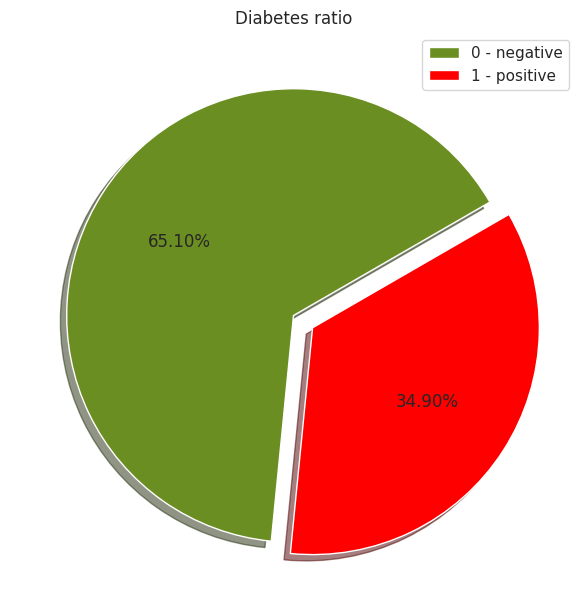

Pie of target variable, done.
Display df_diabetes.diabetes.value_counts() to see absolute values, please.


In [66]:
# Importing & run from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_feng_texp.ipynb"

In [64]:
print(df_diabetes.diabetes.value_counts())

diabetes
0    500
1    268
Name: count, dtype: int64


### [***Feature Engineering.Target variable conclusions***](https://github.com/ddasilva64/DECTRE24001esp/tree/master/projects/docs/feature_engineering_target_conclusions.md)

### ***Análisis bivariable***

***Importante***: Que dos sucesos o fenómenos estén relacionadas entre sí no significa que uno sea la causa del otro, por ejemplo, el gallo canta poco antes del amanecer. Pero el canto del gallo no es la causa de que salga el sol. No es la primera vez que acabamos de lavar el coche y se pone a llover, pero para que llueva, no debemos labar el coche.

***Correlación no implica causalidad***, por lo tanto, debemos tener un contexto ([reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md)) que nos ayude a valorar las posibles relaciones.

In [67]:
# Matriz de los coeficientes de correlación de Pearson
print('Matriz de los coeficientes de correlación de Pearson')
df_diabetes.corr()

Matriz de los coeficientes de correlación de Pearson


,pregnancies,glucose,pressure,bmi,pedigree,age,diabetes
pregnancies,1.000000,0.118320,0.208769,0.029185,0.002894,0.544957,0.204242
glucose,0.118320,1.000000,0.204070,0.228281,0.085419,0.266533,0.492928
pressure,0.208769,0.204070,1.000000,0.272026,0.022154,0.322894,0.165148
bmi,0.029185,0.228281,0.272026,1.000000,0.125607,0.049566,0.300736
pedigree,0.002894,0.085419,0.022154,0.125607,1.000000,0.050651,0.156561
age,0.544957,0.266533,0.322894,0.049566,0.050651,1.000000,0.238356
diabetes,0.204242,0.492928,0.165148,0.300736,0.156561,0.238356,1.000000


Interpretación de la matriz de Pearson a través de un heatmap


[Text(0.5, 36.24999999999996, 'variables en eje X'),
 Text(62.25, 0.5, 'variavles en eje Y')]

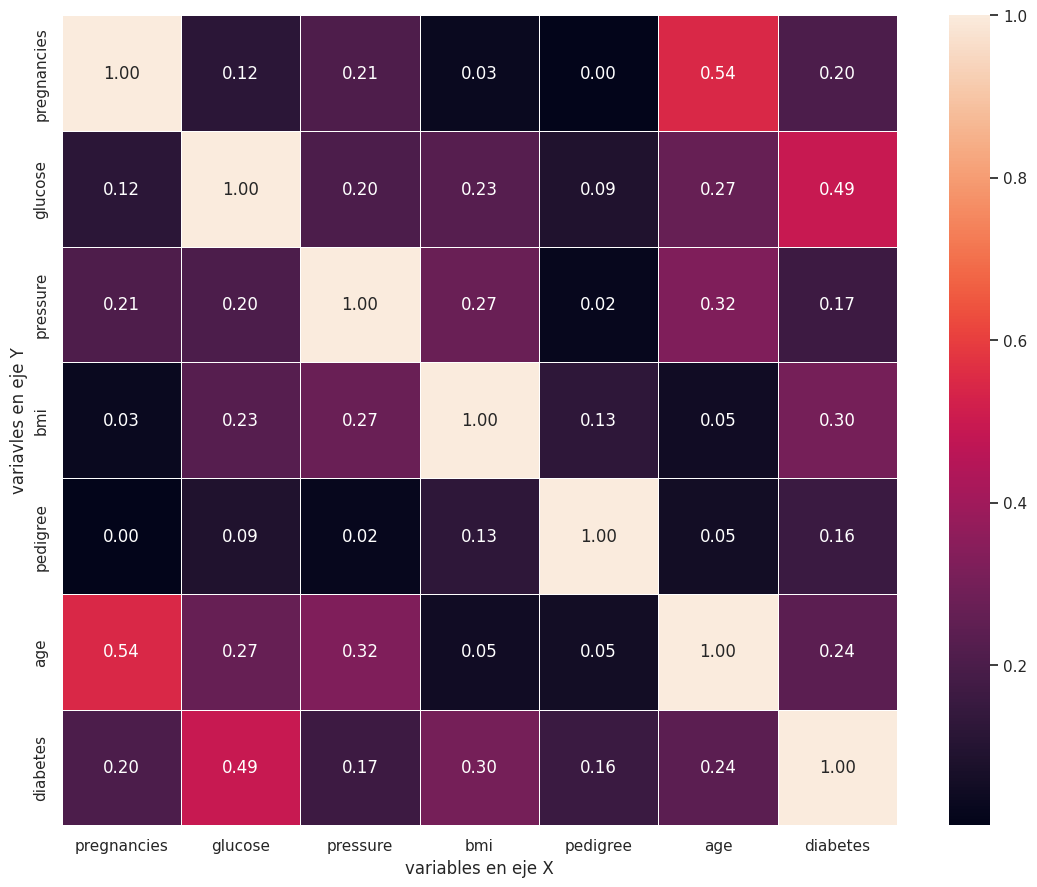

In [68]:
# Interpretación de la matriz de Pearson a través de un heatmap
print('Interpretación de la matriz de Pearson a través de un heatmap')
plt.figure(figsize = (12,10))
ax = sns.heatmap(df_diabetes.corr(), annot =True, fmt=".2f", linewidth=.5)
ax.set(xlabel="variables en eje X", ylabel="variavles en eje Y")

***Nota***: Para que un mapa de calor funcione correctamente, los datos ya deben estar en forma de matriz, la función de sns.heatmap básicamente los colorea.

Si excluimos la relación de las variables consigo mismas (diagonal de unos), vemos que están muy relacionadas:
* ***embarazos*** y ***edad*** (0.54): Obviamente, con la edad se reduce la probabilidad de embarazos, pero no podemos extrapolar esa relación con la diabetes.  

* ***diabetes*** y ***glucosa*** (0.49): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***diabetes*** y ***imc*** (0.29): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***diabetes*** y ***edad*** (0.24): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***presión*** y ***edad*** (0.27): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***glucosa*** y ***edad*** (0.31): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***presión*** e ***imc*** (0.25): Es significativa, pero no podemos extrapolar esa relación con la diabetes.  

* ***glucosa*** e ***imc*** (0.22): Es significativa, pero no podemos extrapolar esa relación con la diabetes.   

* ***glucosa*** e ***presión*** (0.21): Es significativa, pero no podemos extrapolar esa relación con la diabetes.  

En nuestro estudio, parece que extraemos, de momento que glucosa, imc y edad, están muy relacionadas con la diabetes.

Los antecedentes, que en las [reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md) están muy relacionadas, en nuestro modelo, no parecen estarlo. Podría ser que fuese porque és el resultado de una función.


In [ ]:
# Gráficos de dispersión
print("Los gráficos de dispersión respecto a diabetes son:\n")
sns.pairplot(df_diabetes,hue='diabetes')

Como el ***gráfico de dispersión*** muestra posibles relaciones entre múltiples variables, examinando todas las combinaciones de dos en dos, ***los resultados obtenidos deben coincidir con el análisis detallado que haremos posteriormente***. Además, se puede observar la incidencia de la diabetes, sobre la variable individual.

***Combinaciones posibles de variables con la variable target (diabetes)***

| número | relación               | índice de Pearson | valoración índice  | aplica a nuestro dataset  |
| :----: | :----------------      | :---------------: | :---------------:  | :---------------:         |
| 1      | embarazos-diabetes     | 0.20              | poca correlación   |no                        |
| 2      | glucosa-diabetes       | 0.54              | correlación alta   |sí                        |
| 3      | presión-diabetes       | 0.17              | poca correlación   |sí                        |
| 4      | imc-diabetes           | 0.30              | poca correlación   |sí                        |
| 5      | antecedentes-diabetes  | 0.16              | poca correlación   |sí                        |
| 6      | edad-diabetes          | 0.24              | poca correlación   |sí                        |

No podemos valorar la diabetes gestacional, nos faltan características en el dataset.  



En adelante:

***Pearson***  
* 1: 0.1 < 0.3	poca correlación
* 2: 0.3 < 0.5	correlación media
* 3: 0.5 < 0.7	correlación alta
* 4: 0.7 < 1	  correlación muy alta

***Outliers***
* 1: sin outliers
* 2: outliers muy aceptables
* 3: outliers aceptables
* 4: outliers aceptables

Caso 2 (glucosa-diabetes)

#02 glucosa vs diabetes


ValueError: Could not interpret value `glucosa` for `x`. An entry with this name does not appear in `data`.

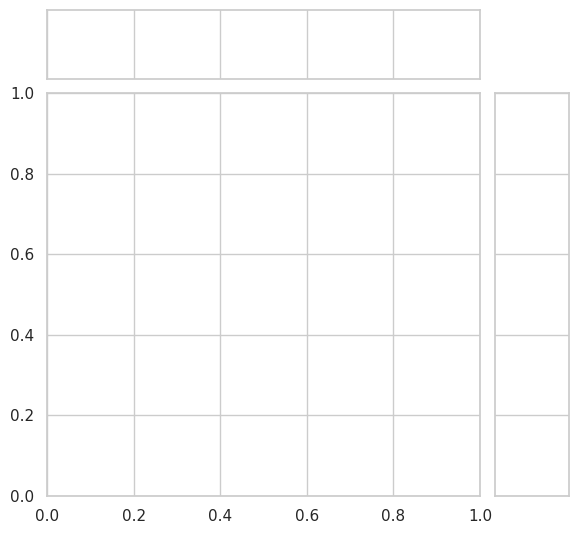

In [70]:
# Graficas de la combinación 02: glucosa-diabetes

print("#02 glucosa vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'glucosa',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="glucosa", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

In [ ]:
plt.style.use("default")
plt.figure(figsize=(120,5))
sns.barplot(x="glucosa", y="diabetes", data=df_diabetes, color='grey')
plt.title("glucosa vs diabetes",fontsize=15)
plt.xlabel("glucosa")
plt.ylabel("diabetes")
plt.show()

|        |glucosa-diabetes|
|:------:|:--------------:|
|Pearson |3               |
|Outliers|1               |
|Diabetes|>131            |

Caso 3 (presión-diabetes)

In [ ]:
# Graficas de la combinación 03: presión-diabetes

print("#03 presión vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'presión',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="presión", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

In [ ]:
plt.style.use("default")
plt.figure(figsize=(45,5))
sns.barplot(x="presión", y="diabetes", data=df_diabetes, color='gray')
plt.title("presión vs diabetes",fontsize=15)
plt.xlabel("presión")
plt.ylabel("diabetes")
plt.show()

|        |presión-diabetes|
|:------:|:--------------:|
|Pearson |1               |
|Outliers|2               |
|Diabetes|40 y >98        |

Caso 4 (imc-diabetes)

In [ ]:
# Graficas de la combinación 04: imc-diabetes

print("#04 imc vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'imc',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="imc", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

In [ ]:
plt.style.use("default")
plt.figure(figsize=(120,5))
sns.barplot(x="imc", y="diabetes", data=df_diabetes, color='grey')
plt.title("imc vs diabetes",fontsize=15)
plt.xlabel("imc")
plt.ylabel("diabetes")
plt.show()

|        |imc-diabetes|
|:------:|:--------------:|
|Pearson |1               |
|Outliers|2               |
|Diabetes|>22.9           |

Caso 5 (antecedentes-diabetes)

In [ ]:
# Graficas de la combinación 05: antecedentes-diabetes

print("#05 antecedentes vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'antecedentes',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="antecedentes", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

In [ ]:
plt.style.use("default")
plt.figure(figsize=(300,5))
sns.barplot(x="antecedentes", y="diabetes", data=df_diabetes, color='grey')
plt.title("antecedentes vs diabetes",fontsize=15)
plt.xlabel("antecedentes")
plt.ylabel("diabetes")
plt.show()

|        |antecedentes-diabetes|
|:------:|:--------------:|
|Pearson |1               |
|Outliers|3               |
|Diabetes|>0.09           |

Caso 6 (edad-diabetes)

In [ ]:
# Graficas de la combinación 06: edad-diabetes

print("#06 edad vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'edad',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="edad", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

In [ ]:
plt.style.use("default")
plt.figure(figsize=(40,5))
sns.barplot(x="edad", y="diabetes", data=df_diabetes, color='grey')
plt.title("edad vs diabetes",fontsize=15)
plt.xlabel("edad")
plt.ylabel("diabetes")
plt.show()

|        |antecedentes-diabetes|
|:------:|:--------------:|
|Pearson |1               |
|Outliers|3               |
|Diabetes|>43             |

***Resumen de las combinaciones posibles de variables***

| número | relación               | Pearson | Outliers | Valor aprox. diabetes |
| :----: | :----------------      | :-----: | :------: | :-------------------: |
| 2      | glucosa-diabetes       | 3       | 1        | >131     |
| 3      | presión-diabetes       | 1       | 2        | 40 y >98 |
| 4      | imc-diabetes           | 1       | 2        | >22.9    |
| 5      | antecedentes-diabetes  | 1       | 3        | >0.09    |
| 6      | edad-diabetes          | 1       | 2        | >43      |








La visión, hasta este punto, de las características del modelo revela que:  

* ***glucosa***: Parece que con valores de glucosa > 131, ya tenemos casos de diabetes, es decir, se producen casos de diabetes antes de lo esperado.

* ***presión***: Parece que con valores de presión arterial diastólica > 98, ya tenemos casos de diabetes, es decir, se producen casos de diabetes con una ligerísma presión alta, antes de lo esperado.  

* ***imc***: Parece que con valores de índice de masa corporal (IMC) > 22.9, ya tenemos casos de diabetes, es decir, se producen casos de diabetes antes de lo esperado.

* ***antecedentes***: Parece que con valores de antecedentes > 0.09 (muy bajo), ya tenemos casos de diabetes, es decir, parece que hay una prevalencia altísima en esta población de antecedentes de diabetes, lo cual, podría explicar que la diabetes aparezca, antes de lo esperado, con las demás características.

* ***edad***: Parece que con valores de edad > 43, ya tenemos casos de diabetes, es decir, se producen casos de diabetes antes de lo esperado.

El nivel de outliers es aceptable en todos los casos.  

Parece que este análisis bivariable nos ha revelado la enorme importancia de los antecedentes familiares, para padecer diabetes.

## ***Modeling***

### ***Modeling (transform the data into quantiles)***

In [ ]:
# Importing & run "modeling (transform the data into quantiles)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_mode_tqua.ipynb"

To check the result, go to df_transformado dataframe, please


In [ ]:
df_transformado

,0,1,2,3,4,5,6
0,0.747718,0.810300,0.516949,0.591265,0.750978,0.889831,1.0
1,0.232725,0.097784,0.336375,0.227510,0.475880,0.558670,0.0
2,0.863755,0.956975,0.279009,0.091917,0.782269,0.585398,1.0
3,0.232725,0.131030,0.336375,0.298566,0.106258,0.000000,0.0
4,0.000000,0.721643,0.050847,0.926988,0.997392,0.606258,1.0
...,...,...,...,...,...,...,...
763,0.940678,0.284224,0.649935,0.552803,0.110821,0.976532,0.0
764,0.387223,0.561930,0.451108,0.760756,0.456323,0.411995,0.0
765,0.677966,0.549544,0.516949,0.213168,0.254889,0.529335,0.0
766,0.232725,0.619948,0.181226,0.400261,0.473924,0.867014,1.0


In [ ]:
# Formato de columnas

# Array de nombres de columnas
df_columns = np.array(['embarazos','glucosa', 'presión', 'imc', 'antecedentes', 'edad', 'diabetes'])

# Asignación del array de nombres de columnas
df_transformado.columns = df_columns

# Visualizamos las columnas definidas del df
print('Columnas del df transformado: ', df_diabetes.columns)

Columnas del df transformado:  Index(['embarazos', 'glucosa', 'presión', 'imc', 'antecedentes', 'edad',
       'diabetes'],
      dtype='object')


In [ ]:
# Visualizamos el df_transformado
df_transformado.head()

,embarazos,glucosa,presión,imc,antecedentes,edad,diabetes
0,0.752934,0.810300,0.467405,0.601695,0.788787,0.889831,1.0
1,0.232725,0.091265,0.286832,0.213168,0.475880,0.558670,0.0
2,0.868970,0.956975,0.229465,0.077575,0.820078,0.585398,1.0
3,0.232725,0.124511,0.286832,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.001304,0.937419,0.588005,0.606258,1.0


### ***Modeling (data splitting)***

In [ ]:
# Importing & run "modeling (data splitting)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_mode_spli.ipynb"

To check the result, go to X_diabetes & y_diabetes dataframes, please


In [ ]:
X_diabetes

,pregnancies,glucose,pressure,bmi,pedigree,age
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63
764,2,122,70,36.8,0.340,27
765,5,121,72,26.2,0.245,30
766,1,126,60,30.1,0.349,47


In [ ]:
y_diabetes

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

## ***Training***

### ***Training (cross-validation)***

In [ ]:
# Importing & run "training (cross-validation)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_trai_cros.ipynb"

X_train_diabetes.shape : (614, 6)
y_train_diabetes.shape : (614,)

500+268=768; 768*0.8=614
features = 6 => shape = (614,6)
target variable = 1 => shape = (614,)

training rows        : 614
test rows            : 154


## ***Training (hyperparameter optimization)***

In [ ]:
# Importing & run "training (hyperparameter optimization)" to Google Colab Notebook from our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_trai_hype.ipynb"

Exception: File `'/content/drive/MyDrive/Colab Notebooks/PRODIA001_trai_hype.ipynb.py'` not found.

## ***Model evaluation***

In [ ]:
# Precisión del modelo
from sklearn.metrics import accuracy_score, classification_report
y_train_pred_diabetes = best_model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = best_model_diabetes.predict(X_test_diabetes)

accuracy_train_diabetes = accuracy_score(y_train_diabetes,y_train_pred_diabetes)
accuracy_test_diabetes = accuracy_score(y_test_diabetes,y_test_pred_diabetes)
print(accuracy_train_diabetes)
print(accuracy_test_diabetes)

0.9739413680781759
0.7857142857142857


Tenemos ***overfitting***, debido a que nuestro dataset es muy pequeño y debemos ajustar el número de estimadores.  

Modificamos los hiperparàmetros hasta encontrar una combinación sin ***overfitting***.

In [ ]:
# Instancia del modelo
rfc_diabetes = RandomForestClassifier(random_state=42)

# Definición de hiperparámetros
param_grid = {
    'n_estimators': [100],
    'max_depth' : [3],
    'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
    'min_samples_split': [4],
    'min_samples_leaf': [2],
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rfc_diabetes, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_diabetes, y_train_diabetes)

# Obtener el modelo con el mejor rendimiento
best_model_diabetes = grid_search.best_estimator_

# Mejores hiperparámetros del modelo
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
# Precisión del modelo
from sklearn.metrics import accuracy_score, classification_report
y_train_pred_diabetes = best_model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = best_model_diabetes.predict(X_test_diabetes)

accuracy_train_diabetes = accuracy_score(y_train_diabetes,y_train_pred_diabetes)
accuracy_test_diabetes = accuracy_score(y_test_diabetes,y_test_pred_diabetes)
print(accuracy_train_diabetes)
print(accuracy_test_diabetes)

0.7833876221498371
0.7727272727272727


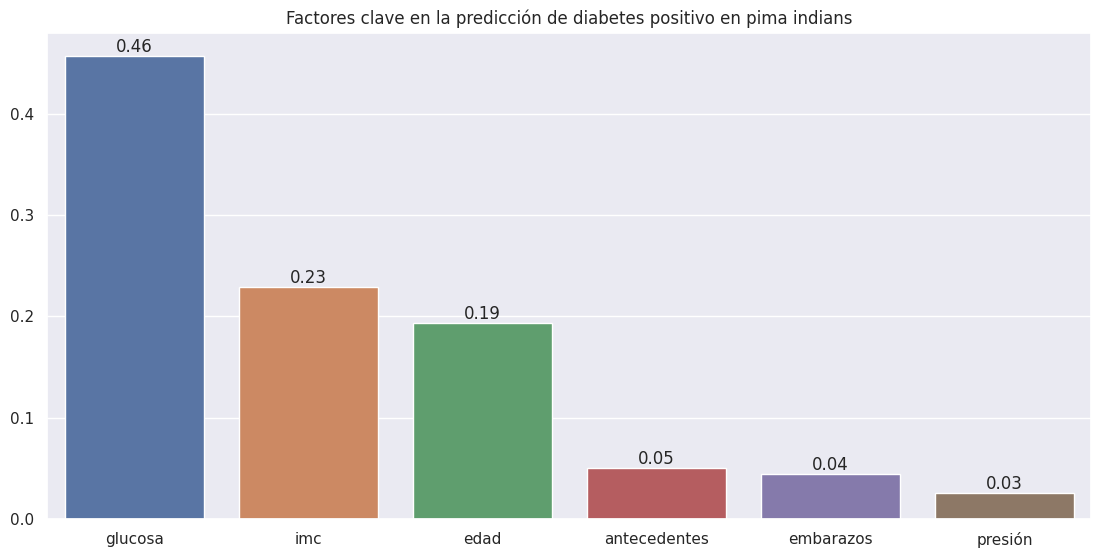

,0
glucosa,0.457435
imc,0.228741
edad,0.193487
antecedentes,0.050513
embarazos,0.044712
presión,0.025113


In [ ]:
# Representación de los factores clave en la predicción de diabetes positivo
feature_scores_diabetes = pd.DataFrame(pd.Series(best_model_diabetes.feature_importances_, index=X_train_diabetes.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_diabetes)

for index, value in enumerate(feature_scores_diabetes.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de diabetes positivo en los nativos pima")
plt.show()
pd.DataFrame(feature_scores_diabetes).T

Matriz de confusión




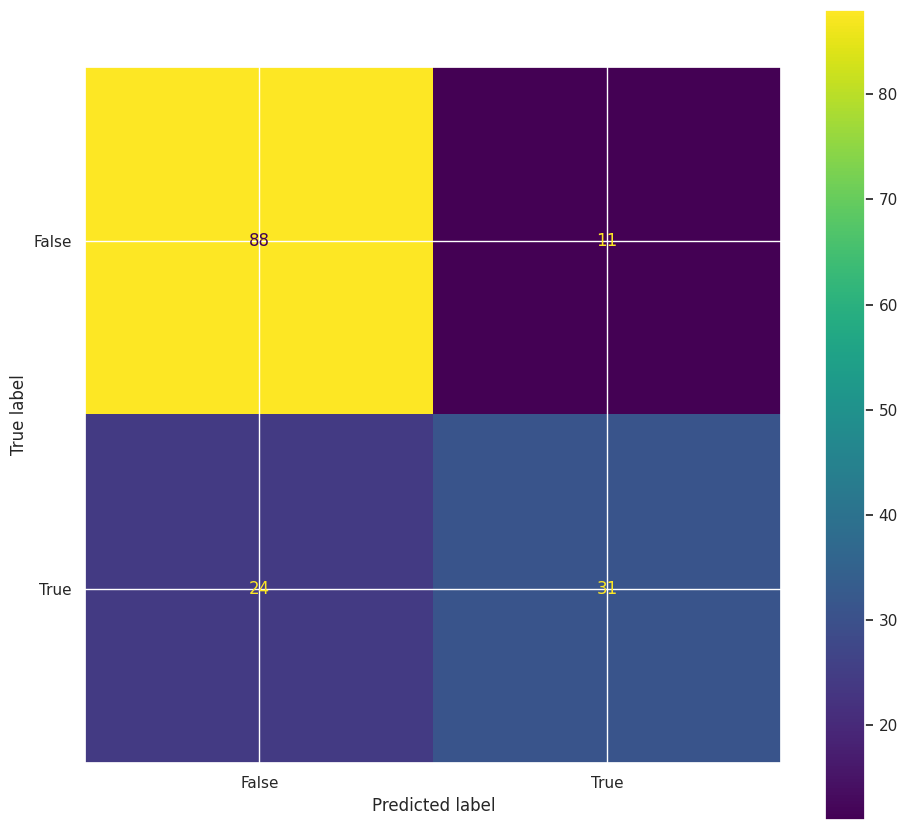

In [ ]:
# Crear la matriz de confusión
cm = metrics.confusion_matrix(y_test_diabetes, y_test_pred_diabetes)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

# Mostrar la matriz de confusión
print('Matriz de confusión\n\n')
cm_display.plot()
plt.show()

***Interpretación***  

* Verdadero negativo (TN) = 88
* Falso positivo (FP) = 11  
* Falso negativo (FN) = 24  
* Verdadero positivo (TP) = 31  

* Verdadero => los valores se predijeron con precisión (88+31=119)  
* Falso     => ha habido un error o una predicción incorrecta (11+24=35)  

Ha habido un 100-35/119*100=70.59% de preción en la predicción

In [ ]:
# Informe de clasificación
print("Informe de clasificación (métricas)\n",classification_report(y_test_diabetes, y_test_pred_diabetes))

Informe de clasificación (métricas)
               precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



***Interpretación de las métricas***:  
  
* precision (precisión o valor predictivo positivo): Proporción de instancias relevantes entre las instancias recuperadas. En otras palabras, responde a la pregunta "¿Qué proporción de identificaciones positivas ha sido realmente correcta?"  
  * promedio $=0.79$
  * diabetes $=\frac{TP}{TP+FP}=\frac{31}{31+11}=\frac{31}{42}=0.74$

* recall (sensibilidad o tasa de aciertos o tasa positiva real -TPR-): Proporción de la cantidad total de instancias pertinentes que se han recuperado realmente. Responde a la pregunta "¿Qué proporción de positivos reales se ha identificado correctamente?"  
  * promedio $=0.89$
  * diabetes $=\frac{TP}{TP+FN}=\frac{31}{31+24}=\frac{31}{55}=0.56$

* f1-score (puntuación F1): Es una medida de la precisión de una prueba, es la media armónica de precisión y recuperación. Puede tener una puntuación máxima de 1 (precisión y recuerdo perfectos) y una mínima de 0. En general, es una medida de la precisión y robustez de su modelo
  * promedio $=0.83$
  * diabetes $=\frac{2xprecisionxrecall}{precision+recall}=\frac{2x0.74x0.56}{0.74+0.56}=\frac{0.83}{1.30}=0.64$

* accuracy (exactitud): Proporción de predicciones que el modelo ha clasificado correctamente.  
  * promedio $=0.76$
  * diabetes $=\frac{nº de predicciones correctas}{nº de predicciones}=\frac{TP+TN}{TP+TN+FP+FN}=\frac{31+88}{31+88+11+24}=\frac{119}{154}=0.77$

El modelo identifica muy bien los casos casos de no diabetes y un poco peor los casos de diabetes. Es mejor, en un primer análisis diagnosticar una persona sana que una enferma, dado que un segundo examen acalarará si la predicción de diabetes es correcta.  

***Un diabético diagnosticado como sano y descartado, para un segundo examen, ¡sería un desastre!. ¡Por lo tanto, la predicción es correcta!***.  


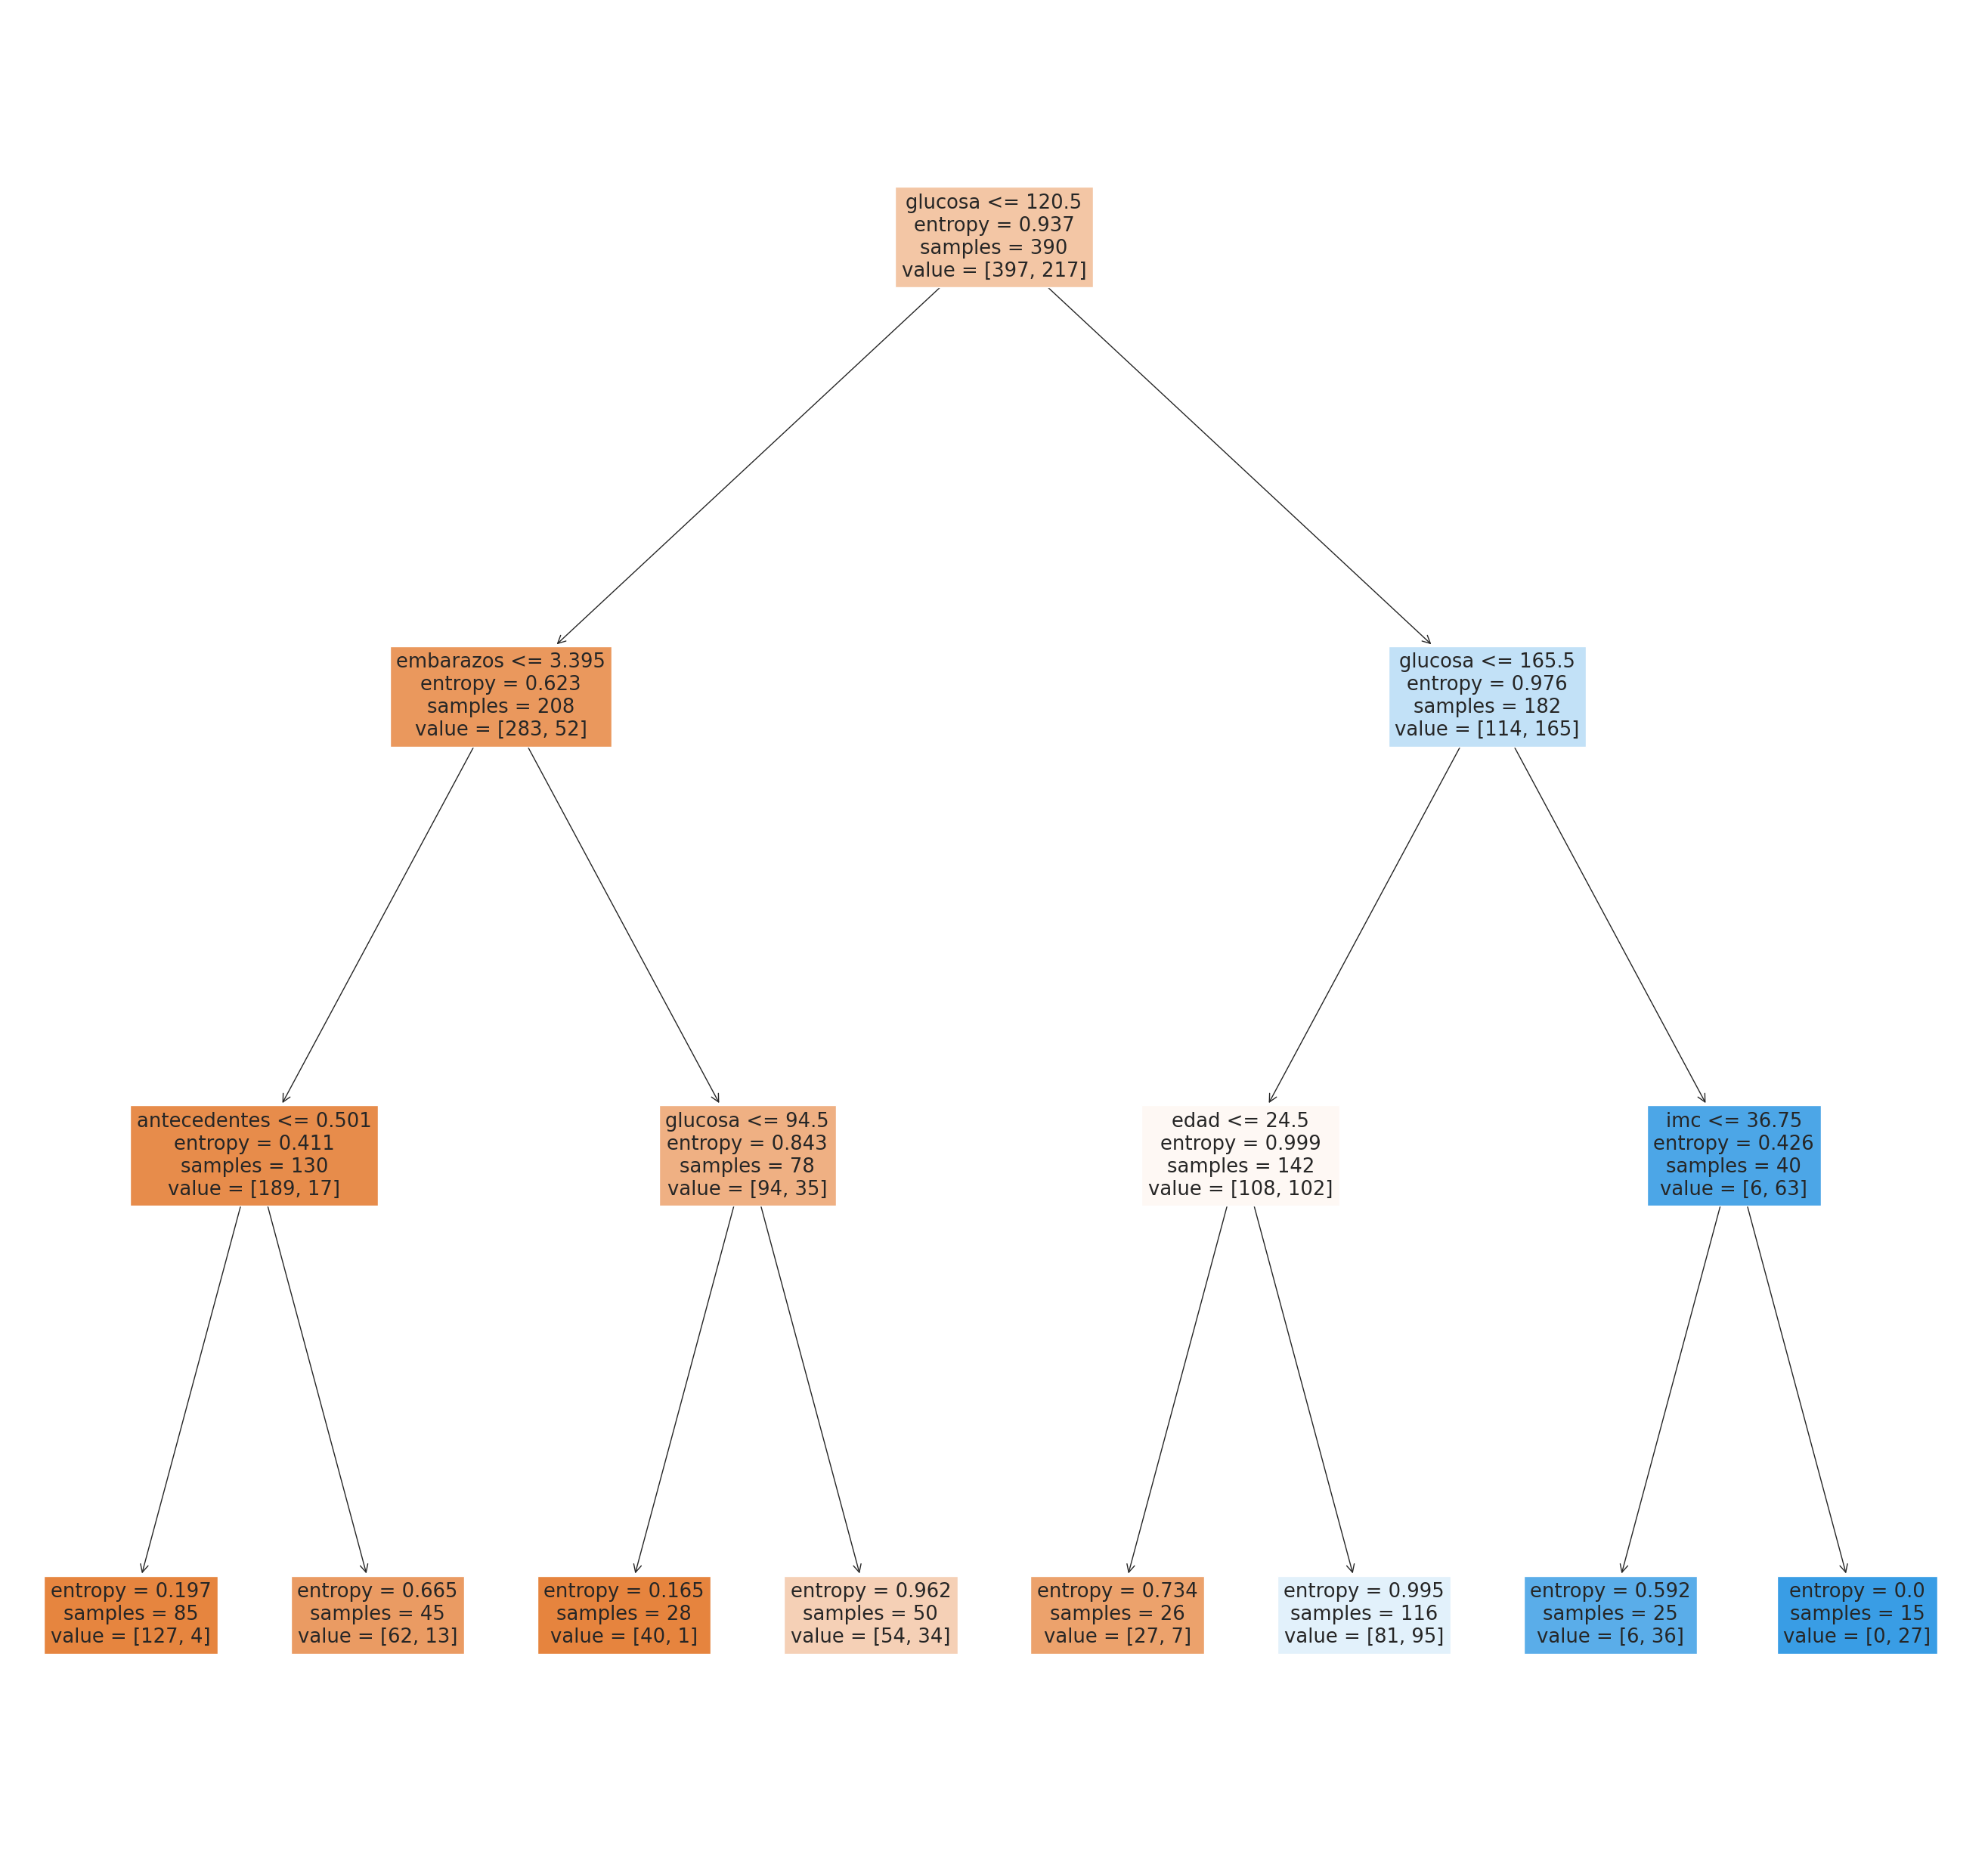

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30, 30))

# Obtener un árbol aleatorio del Random Forest
tree_index = 0  # Índice del árbol deseado
Tree = best_model_diabetes.estimators_[tree_index]

# Visualizar el árbol utilizando plot_tree
tree.plot_tree(Tree, feature_names=X_train_diabetes.columns, filled=True)
plt.show()

Un análisis de las importancias de las características (***feature importances***) revela que las más influyentes para la predicción del modelo son:

* ***glucosa***: Con una importancia de 0.457435, se destaca como la característica más importante. Esto indica que ***la concentración de glucosa en plasma sanguíneo tiene un impacto muy significativo en la predicción de la diabetes***.

* ***imc***: El índice de masa corporal (IMC) es la segunda característica más relevante, con una importancia de 0.228741. Esto sugiere que ***el peso relativo a la altura también juega un papel crucial en la predicción de la diabetes***.

* ***edad***: La edad se posiciona como la tercera característica más importante, con una importancia de 0.050513. Esto indica que ***la edad de la paciente también contribuye significativamente a la predicción de la enfermedad***.

* ***antecedentes***: El valor de los antecedentes de diabetes familiar tiene una importancia de 0.044712. Aunque el valor es muy bajo, los datos que nos proporciona el dataset son resultado de una función que desconocemos (caja negra), con lo cual podría ser importante, pero mucho menos que los tres anteriores.

Las características restantes ***(embarazos y presión) tienen importancias relativamente más bajas*** en comparación con las anteriores, pero aún contribuyen al proceso de predicción. ***Insistimos en que faltan características para tratar la diabetes gestacional, así como otros tipos de diabetes, en nuestro modelo***.




***Conclusiones preliminares***:

1. ***No hay mujeres sin antecedentes de diabetes*** en la población (sea lo que sea que haga la función que nos da el factor que manejamos).
2. Si todas las mujeres tienen antecedentes de diabetes, ***debe existir algún factor de riesgo en esta población que no existe en otras poblaciones***.
3. ***No existen edades, recogidas en el dataset, que permitan inferir una esperanza de vida muy larga*** en esta población, es decir, no es un punto azul. Seguramente la esperanza de vida es de < 90 años en mujeres y menor, incluso, en hombres.
4. El IMC indica que la población analizada, tiene una ***tendencia muy alta a la obesidad*** (con algunos casos de obesidad mórbida).
5. La foto que expresa el dataset es de ***> 33% de incidencia de diabetes*** (tipo 2), en la población femenina. Es decir, podemos hablar de una ***epidemia de diabetes que se ha extendido generaciones hacia el pasado***.
6. Si la encuesta recoje el 100% de la población adulta femenina (de 21 a 81 años), y la moda es de 1 hijo por pareja, entonces ***la población total femenina es muy pequeña***, con lo cual, la población total debe ser también,  muy pequeña (menor de 3,000 personas, probablemente).
7. ***La tasa reproductiva promedio está solo ligéramente por encima de la tasa de reposición de la población***, con lo cual, podría existir una tendencia a la baja en esta y ***podría estar gestándose una crisis demográfica en esta población***.
8. ***Debe existir alguna característica (feature)*** en esta población, ***más importante que la edad***, entre los motivos para la enorme incidencia de la diabetes ***y que tiene que ver con el alto grado de obesidad, con toda seguridad***.

***Recomendaciones***:

1. ***Alimentación más sana*** (con un menor contenido calórico).
2. ***Ejercicio físico regular*** (idealmente diário).
3. ***Tratamiento clínico urgente de los casos de diabetes***, sea de prediabetes o diabetes (tipo 2).
4. ***Campañas que promueban la creación de parejas con personas que no sean de la etnia pima***, para prevenir la consanguineidad de la población.
5. ***Mejora de la sanidad*** en general y en especial de la ***geriátrica***.

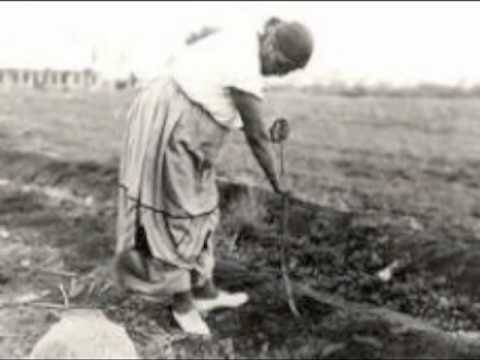

In [ ]:
# Vídeo de los indios Pima (inglés)
YouTubeVideo("pN4HqWRybwk")

***Evolución (hasta 2024) de la población nativa [Pima de Arizona (EEUU)](https://en.wikipedia.org/wiki/Akimel_O%27odham), para poder verificar las previsiones de nuestro RF***:

1. ***El dataset, [originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales de los EEUU](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database), es de*** 1984, ***hace exactamente 40 años***, con lo cual, ya podemos valorar la evolución de los datos.
2. ***Su alimentación tradicional se basaba, sobre todo, en la agricultura tradicional, la caza y la recolección***, lo cual exigía mucho ejercicio físico.
3. Los problemas de salud, en esta población, son básicamente de origen medioambiental relacionados con el ***declive de su economía y agricultura tradicionales***.
4. ***La sustitución de la dieta tradicional por una no autóctona, fueron los principales factores que contribuyeron a la alta tasa de diabetes entre los Pima***.
5. ***En el año 2000, la población que vivía en la comunidad era de 742 personas*** (menos de 1/3 que en 1984).
6. ***Tienen la prevalencia más alta de diabetes tipo 2 del mundo***, mucho más que la observada en otras poblaciones de los EEUU.

***La hipótesis del "[gen ahorrativo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/)" en los nativos Pima:***

* El aumento general de la prevalencia de diabetes es el resultado de la interacción de la ***predisposición genética y*** un ***cambio repentino en la dieta durante el último siglo, de cultivos agrícolas tradicionales a alimentos procesados, junto con una disminución de la actividad física***.

***Conclusiones definitivas***:

1. ***Los factores (features) clave que provocan diabetes***, en esta población son:  
  a) Diréctamente, la concentración de ***glucosa*** en sangre.  
  b) ***IMC*** (importantísimo).  
  c) La ***edad*** (en menor medida).  
  d) ***Antecedentes*** familiares, que identifican, probablemente una predisposión genética.  
2. La ***prevalencia de la diabetes femenina en esta población es exageradamente superior a la prevalencia media mundial general***, de hombres y mujeres (6 veces más, aproximadamente).  

Con lo cual, ***la clasificación proporcionada por nuestro RF, ha funcionado perfectamente***.  

***Prueba de predicción*** en el caso de una mujer anónima catalana:  
  0. ***Embarazos*** = 0    
  1. ***Prueba de tolerancia a la glucosa oral*** = 105 $\frac{mg}{dL}$  
  2. ***Presión arterial diastólica*** = 70 mm Hg   
  3. ***IMC*** ($\frac{peso\ en\ Kg}{(altura\ en\ m)^2}$) = 31  
  4. ***Antecedentes*** = 0  
  5. ***Edad*** = 58 años
  6. ***Predicción RF = no diabetes (entropía=0.197)***       
  7. ***Diagnosticada como = prediabetes***  

Con lo cual, ***la predicción proporcionada por nuestro RF, ha funcionado perfectamente***.  